# データマイニング Report3

+ 全体の流れ
    + NLTKの解説本の0章〜12章まで、計13個のHTMLファイルをダウンロードせよ。
    + BoWベースの特徴ベクトル（Level 1 もしくは Level 2）を生成せよ。
    + 共起行列ベースの特徴ベクトル（Level3）を生成せよ。
    + ラベル付き文書に対して分類タスク（Level4）を実行せよ。
+ Level 1: 文書ファイル毎に、``Bag-of-Words``で特徴ベクトルを生成せよ。
+ Level 2: ``BoW``に``TF-IDF``で重み調整した特徴ベクトルを生成せよ。
+ Level 3: 単語の``共起行列``から特徴ベクトルを生成せよ。
+ Level 4: ``文書分類``せよ。
+ オプション例
    + 相互情報量から``特徴ベクトル``を生成してみよう。
    + 共起行列に基づいた特徴ベクトル、もしくは相互特徴量に基づいた特徴ベクトルを``SVD``により``次元削減``してみよう。
    + SVDによる次元削減時に``2次元``とせよ。気になる単語1つを選び、上位10件と下位10件を2次元空間にマッピングせよ。マッピング結果、どのように散らばっているか観察し、想定とどのぐらい似通っているか考察してみよう。
    + ``日本語文書``について自然言語処理してみよう。

In [52]:
import os
import nltk
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
import numpy as np
import glob
import scipy.spatial.distance as distance
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LEVEL1:文書ファイル毎に、Bag-of-Wordsで特徴ベクトルを生成せよ

+ collect_words_eng(): 英文書集合から単語コードブック作成
    

nltkのdownloadするべきmoudle

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/e175751/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/e175751/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/e175751/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Bag-of-Words

## 文書集合からターム素性集合（コードブック）を作る

In [27]:

def collect_words_eng(docs):
    '''
    英文書集合から単語コードブック作成。
    シンプルに文書集合を予め決めうちした方式で処理する。
    必要に応じて指定できるようにしていた方が使い易いかも。

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :return (list): 文分割、単語分割、基本形、ストップワード除去した、ユニークな単語一覧。
    '''
    
    codebook = []
    stopwords = nltk.corpus.stopwords.words('english') 
    
    #stopwords.append('.')   # ピリオドを追加。
    #stopwords.append(',')   # カンマを追加。
    #stopwords.append('')    # 空文字を追加。
    
    symbol = ["'", '"', ':', ';', '.', ',', '-', '!', '?', "'s","<",">","_"]
    '''
    SWList = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
              "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
              'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 
              'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 
              'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
              'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on',
              'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 
              'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 
              'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
              'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
              'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
              'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    '''
    
    clean_frequency = nltk.FreqDist(w.lower() for w in docs if w.lower() not in stopwords + symbol)
    
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    
    for doc in docs:
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                if this_word not in codebook and this_word not in clean_frequency:
                    codebook.append(this_word)
    return codebook

In [71]:
def collect_words_eng1(docs):
    
    codebook = []
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('.')   # ピリオドを追加。
    stopwords.append(',')   # カンマを追加。
    stopwords.append('')    # 空文字を追加。
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    for doc in docs:
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                if this_word not in codebook and this_word not in stopwords:
                    codebook.append(this_word)
    return codebook

サンプル(test)

In [19]:
docs3 = []
docs3.append("This is test.")
docs3.append("That is test too.")
docs3.append("There are so many many tests.")

``clean_frequencya``を使った場合
これにより、vector数が10個になる

In [20]:
codebook = collect_words_eng1(docs3)
print('codebook = ',codebook)

codebook =  ['test', 'many']


``stopwords``のままの場合
これにより、vector数が2個となる

In [21]:
codebook = collect_words_eng(docs3)
print('codebook = ',codebook)

codebook =  ['this', 'is', 'test', '.', 'that', 'too', 'there', 'are', 'so', 'many']


## コードブックを素性とする文書ベクトルを作る (直接ベクトル生成)

In [28]:
def make_vectors_eng(docs, codebook):
    '''コードブックを素性とする文書ベクトルを作る（直接ベクトル生成）

    :param docs(list): 1文書1文字列で保存。複数文書をリストとして並べたもの。
    :param codebook(list): ユニークな単語一覧。
    :return (list): コードブックを元に、出現回数を特徴量とするベクトルを返す。
    '''
    vectors = []
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    for doc in docs:
        this_vector = []
        fdist = nltk.FreqDist()
        for sent in sent_tokenize(doc):
            for word in wordpunct_tokenize(sent):
                this_word = wnl.lemmatize(word.lower())
                fdist[this_word] += 1
        for word in codebook:
            this_vector.append(fdist[word])
        vectors.append(this_vector)
    return vectors


In [23]:
vectors = make_vectors_eng(docs3, codebook)
for index in range(len(docs3)):
    print('docs[{}] = {}'.format(index,docs3[index]))
    print('vectors[{}] = {}'.format(index,vectors[index]))
    print('----')

docs[0] = This is test.
vectors[0] = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
----
docs[1] = That is test too.
vectors[1] = [0, 1, 1, 1, 1, 1, 0, 0, 0, 0]
----
docs[2] = There are so many many tests.
vectors[2] = [0, 0, 1, 1, 0, 0, 1, 1, 1, 2]
----


## ユークリッド距離

In [29]:
def euclidean_distance(vectors):
    vectors = np.array(vectors)
    distances = []
    for i in range(len(vectors)):
        temp = []
        for j in range(len(vectors)):
            temp.append(np.linalg.norm(vectors[i] - vectors[j]))
        distances.append(temp)
    return distances

In [25]:
distances = euclidean_distance(vectors)
print('# euclidean_distance')
for index in range(len(distances)):
    print(distances[index])


# euclidean_distance
[0.0, 1.7320508075688772, 3.0]
[1.7320508075688772, 0.0, 3.1622776601683795]
[3.0, 3.1622776601683795, 0.0]


## コサイン類似度

In [14]:
def cosine_similarity(vectors):
    vectors = np.array(vectors)
    distances = []
    for i in range(len(vectors)):
        temp = []
        for j in range(len(vectors)):
            temp.append(distance.cosine(vectors[i], vectors[j]))
        distances.append(temp)
    return distances

## コサイン類似度(こっちが本物)

In [30]:
def cos_sim(vector):
    vectors = np.array(vector)
    ListVector=[]
    for i in range(len(vectors)):
        temp=[]
        for j in range(len(vectors)):
            temp.append(np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j])))
        ListVector.append(temp)
    return ListVector

In [28]:
hoge = cos_sim(vectors)
print('# cosine_similarity')
for index in range(len(hoge)):
    print(hoge[index])

# cosine_similarity
[1.0, 0.6708203932499369, 0.3333333333333333]
[0.6708203932499369, 0.9999999999999998, 0.29814239699997197]
[0.3333333333333333, 0.29814239699997197, 1.0]


In [29]:
similarities = cosine_similarity(vectors)
print('# cosine_similarity')
for index in range(len(similarities)):
    print(similarities[index])

# cosine_similarity
[0.0, 0.3291796067500631, 0.6666666666666667]
[0.3291796067500631, 0.0, 0.7018576030000281]
[0.6666666666666667, 0.7018576030000281, 0.0]


## それでは実際に文章を分類する

fileのpathを配列に格納する

In [31]:
List_Data_NL=[]
for i in range(1,14):
    List_Data_NL = glob.glob( "./data/*.html")

In [32]:
List_Data_NL

['./data/kadai1.html',
 './data/kadai6.html',
 './data/kadai10.html',
 './data/kadai11.html',
 './data/kadai7.html',
 './data/kadai4.html',
 './data/kadai12.html',
 './data/kadai8.html',
 './data/kadai9.html',
 './data/kadai13.html',
 './data/kadai5.html',
 './data/kadai2.html',
 './data/kadai3.html']

In [33]:
DataPath = "./data/kadai"

In [34]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [35]:
sentence = []
for i in range(1,len(List_Data_NL)+1):
    with open(DataPath +str(i) + ".html" ) as f:
        r = f.read()
        text = cleanhtml(r)
        sentence.append(text)

In [36]:
sentence

['\n\n\n\nfunction astext(node)\n{\n    return node.innerHTML.replace(/(]+)>)/ig,"")\n                         .replace(/&gt;/ig, ">")\n                         .replace(/&lt;/ig, "<")\n                         .replace(/&quot;/ig, \'"\')\n                         .replace(/&amp;/ig, "&");\n}\n\nfunction copy_notify(node, bar_color, data)\n{\n    // The outer box: relative + inline positioning.\n    var box1 = document.createElement("div");\n    box1.style.position = "relative";\n    box1.style.display = "inline";\n    box1.style.top = "2em";\n    box1.style.left = "1em";\n  \n    // A shadow for fun\n    var shadow = document.createElement("div");\n    shadow.style.position = "absolute";\n    shadow.style.left = "-1.3em";\n    shadow.style.top = "-1.3em";\n    shadow.style.background = "#404040";\n    \n    // The inner box: absolute positioning.\n    var box2 = document.createElement("div");\n    box2.style.position = "relative";\n    box2.style.border = "1px solid #a0a0a0";\n    box

In [39]:
len(codebook)

10500

In [41]:
len(vectors[0])

10500

### コードブック生成

In [37]:
codebook = collect_words_eng(sentence)
print('codebook = ',codebook)

codebook =  ['function', 'astext', '(', 'node', ')', '{', 'return', '.', 'innerhtml', 'replace', '(/(]+)>)/', 'ig', ',"")', '(/&', 'gt', ';/', ',', '">")', 'lt', '"<")', 'quot', '\'"\')', 'amp', '"&");', '}', 'copy_notify', 'bar_color', 'data', '//', 'the', 'outer', 'box', ':', 'relative', '+', 'inline', 'positioning', 'var', 'box1', '=', 'document', 'createelement', '("', 'div', '");', 'style', 'position', '"', '";', 'display', 'top', '2em', 'left', '1em', 'a', 'shadow', 'for', 'fun', 'absolute', '"-', '1', '3em', 'background', '"#', '404040', 'inner', 'box2', 'border', '1px', 'solid', '#', 'a0a0a0', '"-.', 'white', 'padding', '".', '4em', 'fontstyle', 'normal', 'f0e0e0', 'insertbefore', 'childnodes', 'item', '0', '));', 'appendchild', ');', '="', 'copied', '&', 'nbsp', ';', 'to', 'clipboard', '""+', '+"";', 'settimeout', '()', 'removechild', '},', '1000', 'elt', 'parentnode', 'firstchild', 'ffc0c0', '200', 'copy_codeblock_to_clipboard', ')+"\\', 'n', 'if', 'copy_text_to_clipboard', '

### 文書ベクトル

In [38]:
vectors = make_vectors_eng(sentence, codebook)
for index in range(len(sentence)):
    print('vectors[{}] = {}'.format(index,vectors[index]))
    print('----')

vectors[0] = [13, 3, 57, 14, 23, 104, 11, 436, 2, 5, 1, 5, 1, 4, 4, 4, 300, 1, 1, 1, 1, 1, 2, 1, 97, 3, 2, 40, 5, 189, 1, 2, 222, 3, 11, 3, 2, 16, 8, 37, 5, 3, 8, 10, 6, 40, 4, 20, 19, 2, 16, 7, 21, 7, 121, 8, 84, 1, 2, 2, 26, 4, 21, 6, 1, 1, 11, 62, 26, 48, 46, 1, 2, 2, 32, 1, 2, 1, 5, 1, 1, 1, 1, 62, 1, 2, 19, 1, 1, 10, 7, 219, 133, 2, 1, 1, 2, 5, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 6, 17, 3, 2, 2, 5, 1, 14, 1, 13, 10, 2, 2, 3, 1, 5, 21, 2, 1, 2, 3, 4, 1, 12, 229, 1, 2, 1, 2, 11, 2, 4, 2, 2, 26, 2, 2, 1, 31, 2, 1, 1, 8, 15, 26, 1, 59, 1, 1, 1, 1, 4, 10, 8, 3, 3, 18, 2, 3, 3, 11, 2, 3, 5, 1, 1, 1, 3, 4, 11, 8, 3, 1, 10, 9, 1, 3, 1, 1, 1, 26, 2, 2, 1, 1, 1, 2, 5, 7, 5, 2, 2, 2, 4, 14, 7, 1, 92, 1, 2, 7, 38, 5, 2, 2, 25, 22, 48, 31, 2, 56, 3, 1, 3, 41, 1, 1, 1, 6, 3, 1, 1, 1, 5, 33, 1, 1, 1, 10, 3, 6, 2, 1, 2, 1, 4, 25, 1, 29, 11, 4, 3, 30, 2, 1, 6, 8, 4, 3, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 5, 11, 3, 3, 1, 17, 3, 10, 1, 22, 1, 14, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 14, 5, 24, 48, 13, 10, 3, 

In [ ]:
plt.scatter(len(codebook),vectors[0])

In [114]:
list_label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### ユークリッド距離を求める

In [19]:
distances = euclidean_distance(vectors)
print('# euclidean_distance')
for index in range(len(distances)):
    print(distances[index])

# euclidean_distance
[0.0, 1611.9857319467812, 2211.5716131294507, 2678.0039208335747, 2249.7193158258656, 1997.7191994872553, 1775.0504218190536, 1007.4790320398732, 1313.3392554858017, 1403.9907407102085, 795.6418792396489, 1610.5294160616875, 248.18944377229263]
[1611.9857319467812, 0.0, 1079.8273010069713, 1238.4655828887617, 847.4426234265067, 769.4114633926375, 942.8700864912408, 1013.7869598687882, 930.4719232733463, 1157.6579805797564, 2189.460207448402, 815.6512735231889, 1749.6713977201548]
[2211.5716131294507, 1079.8273010069713, 0.0, 940.6784785462033, 1134.5377913494112, 898.9755280317702, 1556.1834724736027, 1622.224706999619, 1581.9352072698805, 1640.3581925908743, 2713.5266720634977, 1422.728364797722, 2323.9477188611622]
[2678.0039208335747, 1238.4655828887617, 940.6784785462033, 0.0, 934.0706611386528, 1063.5229193581115, 1644.6163686404195, 1974.9706326930534, 1822.5358707032353, 1892.6597686853281, 3212.9349511000064, 1560.6473016027676, 2803.7241305092766]
[2249.71

### コサイン類似度を求める

In [57]:
cosin = cos_sim(vectors)
print('# cosine_similarity')
for index in range(len(cosin)):
    print(np.round(cosin[index],3))

# cosine_similarity
[1.    0.817 0.726 0.745 0.811 0.782 0.85  0.882 0.875 0.765 0.699 0.836
 0.971]
[0.817 1.    0.926 0.966 0.977 0.959 0.921 0.902 0.907 0.852 0.627 0.932
 0.789]
[0.726 0.926 1.    0.964 0.919 0.944 0.824 0.838 0.822 0.806 0.593 0.855
 0.708]
[0.745 0.966 0.964 1.    0.96  0.958 0.869 0.868 0.864 0.849 0.58  0.901
 0.723]
[0.811 0.977 0.919 0.96  1.    0.958 0.932 0.914 0.919 0.88  0.628 0.93
 0.78 ]
[0.782 0.959 0.944 0.958 0.958 1.    0.9   0.912 0.89  0.847 0.606 0.909
 0.761]
[0.85  0.921 0.824 0.869 0.932 0.9   1.    0.921 0.936 0.855 0.68  0.897
 0.826]
[0.882 0.902 0.838 0.868 0.914 0.912 0.921 1.    0.938 0.857 0.657 0.909
 0.874]
[0.875 0.907 0.822 0.864 0.919 0.89  0.936 0.938 1.    0.873 0.702 0.888
 0.86 ]
[0.765 0.852 0.806 0.849 0.88  0.847 0.855 0.857 0.873 1.    0.552 0.829
 0.762]
[0.699 0.627 0.593 0.58  0.628 0.606 0.68  0.657 0.702 0.552 1.    0.596
 0.638]
[0.836 0.932 0.855 0.901 0.93  0.909 0.897 0.909 0.888 0.829 0.596 1.
 0.829]
[0.971 0.789

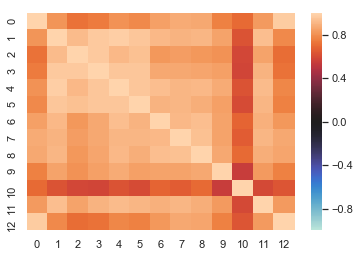

In [50]:
sns.heatmap(cosin,vmax=1, vmin=-1, center=0)

In [58]:
list_label=[0,1,2,3,4,5,6,7,8,9,10,11,12]
cosin = np.round(cosin,3)
df = pd.DataFrame(cosin,list_label)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,0.817,0.726,0.745,0.811,0.782,0.850,0.882,0.875,0.765,0.699,0.836,0.971
1,0.817,1.000,0.926,0.966,0.977,0.959,0.921,0.902,0.907,0.852,0.627,0.932,0.789
2,0.726,0.926,1.000,0.964,0.919,0.944,0.824,0.838,0.822,0.806,0.593,0.855,0.708
3,0.745,0.966,0.964,1.000,0.960,0.958,0.869,0.868,0.864,0.849,0.580,0.901,0.723
4,0.811,0.977,0.919,0.960,1.000,0.958,0.932,0.914,0.919,0.880,0.628,0.930,0.780
5,0.782,0.959,0.944,0.958,0.958,1.000,0.900,0.912,0.890,0.847,0.606,0.909,0.761
6,0.850,0.921,0.824,0.869,0.932,0.900,1.000,0.921,0.936,0.855,0.680,0.897,0.826
7,0.882,0.902,0.838,0.868,0.914,0.912,0.921,1.000,0.938,0.857,0.657,0.909,0.874
8,0.875,0.907,0.822,0.864,0.919,0.890,0.936,0.938,1.000,0.873,0.702,0.888,0.860
9,0.765,0.852,0.806,0.849,0.880,0.847,0.855,0.857,0.873,1.000,0.552,0.829,0.762


In [72]:
codebook = collect_words_eng1(sentence)
distances = euclidean_distance(vectors)
cosin = cos_sim(vectors)
cosin = np.round(cosin,3)
df = pd.DataFrame(cosin,list_label)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,0.817,0.726,0.745,0.811,0.782,0.850,0.882,0.875,0.765,0.699,0.836,0.971
1,0.817,1.000,0.926,0.966,0.977,0.959,0.921,0.902,0.907,0.852,0.627,0.932,0.789
2,0.726,0.926,1.000,0.964,0.919,0.944,0.824,0.838,0.822,0.806,0.593,0.855,0.708
3,0.745,0.966,0.964,1.000,0.960,0.958,0.869,0.868,0.864,0.849,0.580,0.901,0.723
4,0.811,0.977,0.919,0.960,1.000,0.958,0.932,0.914,0.919,0.880,0.628,0.930,0.780
5,0.782,0.959,0.944,0.958,0.958,1.000,0.900,0.912,0.890,0.847,0.606,0.909,0.761
6,0.850,0.921,0.824,0.869,0.932,0.900,1.000,0.921,0.936,0.855,0.680,0.897,0.826
7,0.882,0.902,0.838,0.868,0.914,0.912,0.921,1.000,0.938,0.857,0.657,0.909,0.874
8,0.875,0.907,0.822,0.864,0.919,0.890,0.936,0.938,1.000,0.873,0.702,0.888,0.860
9,0.765,0.852,0.806,0.849,0.880,0.847,0.855,0.857,0.873,1.000,0.552,0.829,0.762


## それぞれのFiIeの関係性をコサイン類似度で確認する

In [40]:
for i in range(0,len(sentence)):
    for j in range(0,len(sentence)):
        list=[]
        if i < j:
            print(i,j)
            list.append(sentence[i])
            list.append(sentence[j])
            
        else:
            continue
        codebook = collect_words_eng(list)
        vectors = make_vectors_eng(list, codebook)
        similarities = cos_sim(vectors)
        print('# cosine_similarity')
        for index in range(len(similarities)):
            print(np.round(similarities[index],3))

0 1
# cosine_similarity
[1.    0.811]
[0.811 1.   ]
0 2
# cosine_similarity
[1.    0.813]
[0.813 1.   ]
0 3
# cosine_similarity
[1.    0.781]
[0.781 1.   ]
0 4
# cosine_similarity
[1.  0.8]
[0.8 1. ]
0 5
# cosine_similarity
[1.   0.82]
[0.82 1.  ]
0 6
# cosine_similarity
[1.    0.876]
[0.876 1.   ]
0 7
# cosine_similarity
[1.    0.828]
[0.828 1.   ]
0 8
# cosine_similarity
[1.    0.858]
[0.858 1.   ]
0 9
# cosine_similarity
[1.    0.793]
[0.793 1.   ]
0 10
# cosine_similarity
[1.    0.651]
[0.651 1.   ]
0 11
# cosine_similarity
[1.    0.871]
[0.871 1.   ]
0 12
# cosine_similarity
[1.    0.907]
[0.907 1.   ]
1 2
# cosine_similarity
[1.    0.987]
[0.987 1.   ]
1 3
# cosine_similarity
[1.    0.994]
[0.994 1.   ]
1 4
# cosine_similarity
[1.    0.993]
[0.993 1.   ]
1 5
# cosine_similarity
[1.    0.991]
[0.991 1.   ]
1 6
# cosine_similarity
[1.    0.963]
[0.963 1.   ]
1 7
# cosine_similarity
[1.    0.978]
[0.978 1.   ]
1 8
# cosine_similarity
[1.   0.98]
[0.98 1.  ]
1 9
# cosine_similarity
[

ここで一度別の**前処理**として、文章ベクトルを**標準化**を行う

## 文章ベクトルを標準化

In [61]:
#from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [62]:
vectors = make_vectors_eng(sentence, codebook)
ppSS = StandardScaler()

In [63]:
data_std = ppSS.fit_transform(vectors)

In [64]:
print(type(data_std))
print(len(data_std[0]))

<class 'numpy.ndarray'>
10500


In [65]:
for index in range(len(data_std)):
    print('vectors[{}] = {}'.format(index,data_std[index]))
    print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

vectors[0] = [-0.44622066  0.28867513 -1.52352009 ... -0.28867513 -0.28867513
 -0.28867513]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
vectors[1] = [ 0.05354648  0.28867513  0.05836863 ... -0.28867513 -0.28867513
 -0.28867513]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
vectors[2] = [ 0.51761596  0.28867513  0.1162426  ... -0.28867513 -0.28867513
 -0.28867513]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
vectors[3] = [ 0.01784883  0.28867513  1.07437845 ... -0.28867513 -0.28867513
 -0.28867513]
--------------------------------------------------------------------------------------------------------------

In [66]:
hoge = cos_sim(data_std)
print('# cosine_similarity')
for index in range(len(hoge)):
    print(np.round(hoge[index],3))

# cosine_similarity
[ 1.    -0.082 -0.126 -0.175 -0.118 -0.109 -0.096 -0.024 -0.064 -0.03
  0.189 -0.064  0.174]
[-0.082  1.    -0.086 -0.084 -0.063 -0.076 -0.081 -0.105 -0.098 -0.117
 -0.113 -0.112 -0.106]
[-0.126 -0.086  1.    -0.101 -0.1   -0.096 -0.12  -0.133 -0.127 -0.128
 -0.128 -0.104 -0.139]
[-0.175 -0.084 -0.101  1.    -0.055 -0.1   -0.107 -0.12  -0.119 -0.136
 -0.21  -0.104 -0.199]
[-0.118 -0.063 -0.1   -0.055  1.    -0.066 -0.065 -0.12  -0.088 -0.106
 -0.176 -0.079 -0.152]
[-0.109 -0.076 -0.096 -0.1   -0.066  1.    -0.058 -0.06  -0.071 -0.091
 -0.104 -0.101 -0.105]
[-0.096 -0.081 -0.12  -0.107 -0.065 -0.058  1.    -0.04  -0.068 -0.087
 -0.097 -0.094 -0.076]
[-0.024 -0.105 -0.133 -0.12  -0.12  -0.06  -0.04   1.    -0.045 -0.047
  0.041 -0.093  0.001]
[-0.064 -0.098 -0.127 -0.119 -0.088 -0.071 -0.068 -0.045  1.     0.003
 -0.039 -0.097 -0.041]
[-0.03  -0.117 -0.128 -0.136 -0.106 -0.091 -0.087 -0.047  0.003  1.
  0.028 -0.096  0.001]
[ 0.189 -0.113 -0.128 -0.21  -0.176 -0.104 -

## 正規化してデータ分析

In [67]:
ms = MinMaxScaler()
mms = ms.fit_transform(vectors)
print(mms)

[[0.05829596 1.         0.10950413 ... 0.         0.         0.        ]
 [0.1838565  1.         0.6177686  ... 0.         0.         0.        ]
 [0.30044843 1.         0.63636364 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08520179 1.         0.45454545 ... 0.         0.         0.        ]
 [0.03139013 1.         0.12396694 ... 1.         1.         1.        ]]


In [68]:
for i in range(len(mms[0])):
    print(mms[0][i],vectors[0][i])

0.05829596412556054 13
1.0 3
0.10950413223140495 57
0.5185185185185185 14
0.08368200836820083 23
0.8188976377952756 104
0.14666666666666667 11
0.3102678571428571 436
1.0 2
0.38461538461538464 5
1.0 1
1.0 5
1.0 1
1.0 4
0.00404040404040404 4
0.03333333333333333 4
0.3073727933541017 300
1.0 1
0.0035335689045936395 1
1.0 1
1.0 1
1.0 1
0.15384615384615385 2
1.0 1
0.9150943396226415 97
1.0 3
1.0 2
0.3023255813953488 40
0.5555555555555556 5
0.1886993603411514 189
1.0 1
0.4 2
0.44646464646464645 222
0.42857142857142855 3
0.19298245614035087 11
0.75 3
1.0 2
0.9411764705882353 16
1.0 8
0.07708333333333334 37
0.09803921568627451 5
1.0 3
0.17391304347826086 8
1.0 10
1.0 6
0.8163265306122448 40
0.4 4
0.13986013986013987 20
0.9500000000000001 19
0.2 2
0.48484848484848486 16
1.0 7
0.4117647058823529 21
1.0 7
0.16483516483516486 121
1.0 8
0.31906614785992216 84
0.3333333333333333 1
0.6666666666666666 2
1.0 2
0.1937984496124031 26
1.0 4
1.0 21
1.0 6
1.0 1
1.0 1
1.0 11
1.0 62
1.0 26
1.0 48
0.65714285714

1.0 1
1.0 1
0.38461538461538464 5
0.3333333333333333 2
1.0 4
0.2 1
0.2 1
0.07142857142857142 2
0.3333333333333333 3
0.15555555555555556 7
0.1111111111111111 4
1.0 1
0.16666666666666666 1
1.0 2
0.25 2
0.11235955056179775 10
0.19047619047619047 4
1.0 1
0.1875 3
0.3333333333333333 1
0.3333333333333333 1
1.0 1
1.0 2
1.0 1
0.625 5
0.20833333333333331 5
0.5 1
0.3333333333333333 2
0.3333333333333333 2
1.0 1
1.0 1
1.0 1
0.15555555555555556 7
0.8 4
0.9999999999999999 13
0.14285714285714285 2
0.5 1
0.5 1
0.23255813953488372 10
1.0 1
0.5 1
1.0 1
0.042105263157894736 4
0.043478260869565216 1
1.0 7
0.3333333333333333 1
1.0 2
1.0 2
0.5 1
0.5555555555555556 5
0.3333333333333333 1
0.1764705882352941 3
0.16666666666666666 1
0.3 9
1.0 1
1.0 3
1.0 1
0.07692307692307693 1
1.0 1
0.5 1
0.6666666666666666 2
0.42105263157894735 17
1.0 3
1.0 1
1.0 1
0.2 1
0.11764705882352941 2
0.16666666666666666 1
0.5 1
1.0 1
0.42857142857142855 3
0.6666666666666666 2
0.14285714285714285 1
1.0 2
1.0 1
1.0 1
0.1666666666666666

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 

In [69]:
cosin = cos_sim(mms)
print('# cosine_similarity')
for index in range(len(cosin)):
    print(np.round(cosin[index],3))

# cosine_similarity
[1.    0.315 0.261 0.263 0.314 0.298 0.306 0.314 0.313 0.307 0.063 0.317
 0.409]
[0.315 1.    0.284 0.308 0.343 0.332 0.323 0.3   0.314 0.276 0.036 0.284
 0.291]
[0.261 0.284 1.    0.262 0.285 0.285 0.266 0.252 0.263 0.243 0.023 0.26
 0.243]
[0.263 0.308 0.262 1.    0.339 0.305 0.298 0.297 0.296 0.267 0.018 0.282
 0.244]
[0.314 0.343 0.285 0.339 1.    0.349 0.348 0.306 0.338 0.305 0.02  0.319
 0.285]
[0.298 0.332 0.285 0.305 0.349 1.    0.349 0.338 0.342 0.302 0.022 0.298
 0.293]
[0.306 0.323 0.266 0.298 0.348 0.349 1.    0.353 0.338 0.306 0.016 0.302
 0.316]
[0.314 0.3   0.252 0.297 0.306 0.338 0.353 1.    0.341 0.311 0.011 0.298
 0.318]
[0.313 0.314 0.263 0.296 0.338 0.342 0.338 0.341 1.    0.372 0.027 0.303
 0.319]
[0.307 0.276 0.243 0.267 0.305 0.302 0.306 0.311 0.372 1.    0.023 0.28
 0.313]
[0.063 0.036 0.023 0.018 0.02  0.022 0.016 0.011 0.027 0.023 1.    0.023
 0.031]
[0.317 0.284 0.26  0.282 0.319 0.298 0.302 0.298 0.303 0.28  0.023 1.
 0.305]
[0.409 0.291 

In [70]:
cosin = np.round(cosin,3)
df = pd.DataFrame(cosin,list_label)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,0.315,0.261,0.263,0.314,0.298,0.306,0.314,0.313,0.307,0.063,0.317,0.409
1,0.315,1.000,0.284,0.308,0.343,0.332,0.323,0.300,0.314,0.276,0.036,0.284,0.291
2,0.261,0.284,1.000,0.262,0.285,0.285,0.266,0.252,0.263,0.243,0.023,0.260,0.243
3,0.263,0.308,0.262,1.000,0.339,0.305,0.298,0.297,0.296,0.267,0.018,0.282,0.244
4,0.314,0.343,0.285,0.339,1.000,0.349,0.348,0.306,0.338,0.305,0.020,0.319,0.285
5,0.298,0.332,0.285,0.305,0.349,1.000,0.349,0.338,0.342,0.302,0.022,0.298,0.293
6,0.306,0.323,0.266,0.298,0.348,0.349,1.000,0.353,0.338,0.306,0.016,0.302,0.316
7,0.314,0.300,0.252,0.297,0.306,0.338,0.353,1.000,0.341,0.311,0.011,0.298,0.318
8,0.313,0.314,0.263,0.296,0.338,0.342,0.338,0.341,1.000,0.372,0.027,0.303,0.319
9,0.307,0.276,0.243,0.267,0.305,0.302,0.306,0.311,0.372,1.000,0.023,0.280,0.313


## 主成分分析によるデータの圧縮化(標準化)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=10)
pca.fit(data_std)
print(pca.explained_variance_ratio_)
print("------------------------------------------------------------------------------------------------------------------------------------------------------")
print(pca.singular_values_)
print("------------------------------------------------------------------------------------------------------------------------------------------------------")
pca_X = pca.transform(data_std)
print(pca_X)

[0.30571528 0.16943287 0.0849565  0.06835538 0.06490385 0.0574546
 0.05544767 0.04645715 0.04230637 0.03883215]
------------------------------------------------------------------------------------------------------------------------------------------------------
[116.34629908  86.61494477  61.33273226  55.01490413  53.60795238
  50.43783141  49.54908631  45.35448967  43.28095887  41.46576691]
------------------------------------------------------------------------------------------------------------------------------------------------------
[[-1.18160964e+01  2.06532198e+01 -1.58291485e+00 -1.34507865e+00
   7.34272066e-01 -4.21848692e+00 -1.17986159e+00 -9.20080918e+00
   1.21000796e+01 -5.14824092e+00]
 [-7.39059816e+00 -1.25558051e+01  2.03533271e-01 -2.39158208e+00
  -5.42101998e+00 -3.57650560e+00 -1.49981726e+01 -1.07674155e+01
   3.16270821e+01 -6.61631430e+00]
 [-4.30205424e+00 -1.19505126e+01 -4.11783831e+00 -5.28660507e+00
  -1.17443400e+01 -1.31779064e+01 -2.47759010e+01 -2.

## 最終的なコサイン類似度の計算(標準化)

In [52]:
hoge = cos_sim(pca_X)
print('# cosine_similarity')
for index in range(len(hoge)):
    print(np.round(hoge[index],3))

# cosine_similarity
[ 1.     0.318 -0.167 -0.503 -0.398 -0.358 -0.264  0.295 -0.064  0.213
  0.58  -0.307  0.477]
[ 0.318  1.     0.076  0.108  0.057  0.059 -0.017  0.058 -0.092 -0.185
 -0.235 -0.224 -0.194]
[-0.167  0.076  1.     0.063  0.001  0.052 -0.07  -0.207 -0.089 -0.084
 -0.145 -0.135 -0.173]
[-0.503  0.108  0.063  1.     0.162  0.021 -0.019 -0.244 -0.03  -0.117
 -0.301 -0.101 -0.267]
[-0.398  0.057  0.001  0.162  1.     0.044  0.027 -0.402 -0.06  -0.113
 -0.312 -0.096 -0.249]
[-0.358  0.059  0.052  0.021  0.044  1.    -0.02   0.313 -0.044 -0.056
 -0.184 -0.182 -0.171]
[-0.264 -0.017 -0.07  -0.019  0.027 -0.02   1.     0.304 -0.04  -0.065
 -0.189 -0.163 -0.134]
[ 0.295  0.058 -0.207 -0.244 -0.402  0.313  0.304  1.     0.49   0.282
  0.374 -0.575 -0.069]
[-0.064 -0.092 -0.089 -0.03  -0.06  -0.044 -0.04   0.49   1.     0.099
 -0.093 -0.214 -0.092]
[ 0.213 -0.185 -0.084 -0.117 -0.113 -0.056 -0.065  0.282  0.099  1.
 -0.011 -0.226 -0.061]
[ 0.58  -0.235 -0.145 -0.301 -0.312 -0.184 

## 主成分分析だけしたデータでのコサイン類似度

In [53]:
pca.fit(vectors)
pca_y = pca.transform(vectors)

In [54]:
hoge = cos_sim(pca_y)
print('# cosine_similarity')
for index in range(len(hoge)):
    print(np.round(hoge[index],3))

# cosine_similarity
[ 1.    -0.944 -0.935 -0.983 -0.981 -0.946  0.147  0.508  0.351 -0.516
  0.995  0.779  0.998]
[-0.944  1.     0.862  0.954  0.929  0.888 -0.21  -0.614 -0.324  0.48
 -0.932 -0.805 -0.943]
[-0.935  0.862  1.     0.935  0.912  0.935 -0.232 -0.479 -0.471  0.359
 -0.933 -0.744 -0.942]
[-0.983  0.954  0.935  1.     0.969  0.937 -0.262 -0.56  -0.42   0.475
 -0.969 -0.804 -0.98 ]
[-0.981  0.929  0.912  0.969  1.     0.927 -0.185 -0.468 -0.396  0.413
 -0.971 -0.754 -0.978]
[-0.946  0.888  0.935  0.937  0.927  1.    -0.158 -0.503 -0.405  0.363
 -0.946 -0.759 -0.955]
[ 0.147 -0.21  -0.232 -0.262 -0.185 -0.158  1.    -0.019  0.466 -0.058
  0.077  0.275  0.128]
[ 0.508 -0.614 -0.479 -0.56  -0.468 -0.503 -0.019  1.     0.096 -0.434
  0.521  0.484  0.524]
[ 0.351 -0.324 -0.471 -0.42  -0.396 -0.405  0.466  0.096  1.     0.148
  0.296  0.205  0.329]
[-0.516  0.48   0.359  0.475  0.413  0.363 -0.058 -0.434  0.148  1.
 -0.497 -0.576 -0.496]
[ 0.995 -0.932 -0.933 -0.969 -0.971 -0.946  

## 正規化の主成分分析

In [55]:
pca.fit(mms)
pca_z = pca.transform(mms)

In [56]:
hoge = cos_sim(pca_z)
print('# cosine_similarity')
for index in range(len(hoge)):
    print(np.round(hoge[index],3))

# cosine_similarity
[ 1.     0.16  -0.134 -0.502 -0.392 -0.374 -0.293  0.229 -0.155  0.186
  0.738 -0.291  0.534]
[ 0.16   1.     0.036  0.068  0.019  0.045 -0.035 -0.066 -0.088 -0.167
 -0.229 -0.181 -0.172]
[-0.134  0.036  1.     0.054 -0.011  0.039 -0.083 -0.235 -0.102 -0.095
 -0.152 -0.108 -0.184]
[-0.502  0.068  0.054  1.     0.154  0.01  -0.03  -0.26  -0.04  -0.138
 -0.314 -0.069 -0.272]
[-0.392  0.019 -0.011  0.154  1.     0.036  0.009 -0.413 -0.064 -0.125
 -0.31  -0.072 -0.251]
[-0.374  0.045  0.039  0.01   0.036  1.    -0.049  0.355 -0.067 -0.079
 -0.194 -0.166 -0.169]
[-0.293 -0.035 -0.083 -0.03   0.009 -0.049  1.     0.276 -0.053 -0.05
 -0.185 -0.147 -0.119]
[ 0.229 -0.066 -0.235 -0.26  -0.413  0.355  0.276  1.     0.358  0.144
  0.53  -0.496 -0.082]
[-0.155 -0.088 -0.102 -0.04  -0.064 -0.067 -0.053  0.358  1.     0.092
 -0.092 -0.182 -0.088]
[ 0.186 -0.167 -0.095 -0.138 -0.125 -0.079 -0.05   0.144  0.092  1.
  0.01  -0.219 -0.049]
[ 0.738 -0.229 -0.152 -0.314 -0.31  -0.194 -